### Step 1: Reading and Understanding the Data

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing all required packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing Dataset

bike = pd.read_csv('day.csv')

In [4]:
# checking head of the dataset

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape

bike.shape

(730, 16)

In [6]:
# checking info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### As can see above there is no null/missing values in the dataset

In [7]:
# let's describe the dataset

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Understanding categorical variables and their mapping
#### In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them, let's convert such feature values into categorical string values.

In [8]:
# defining the map function for Season 
# 1:spring, 2:summer, 3:fall, 4:winter

def season_map(x):
    return {1 : "spring", 2 : "summer", 3 : "fall", 4 : "winter"}[x]

#applying the function to the season 
bike["season"] = bike["season"].apply(season_map)

In [9]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [10]:
# defining the map function for Weathersit
# weathersit : 
    # 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    # 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    # 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

def weathersit_map(x):
    return {1 : "clear", 2 : "mist", 3 : "light", 4 : "heavy"}[x]

# applying the function to the weathersit
bike["weathersit"] = bike["weathersit"].apply(weathersit_map)

In [11]:
bike.weathersit.value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [12]:
# defining the map function for weekday
# 1 : Monday
# 2 : Tuesday
# -------
# 0 : Sunday

def weekday_map(x):
    return{0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'}[x]

bike['weekday'] = bike['weekday'].apply(weekday_map)

In [13]:
# defining the map function for month

def month_map(x):
    return{1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'Aug',
           9 : 'Sept', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}[x]

bike['mnth'] = bike['mnth'].apply(month_map)

In [14]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2: Visualising the Data

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

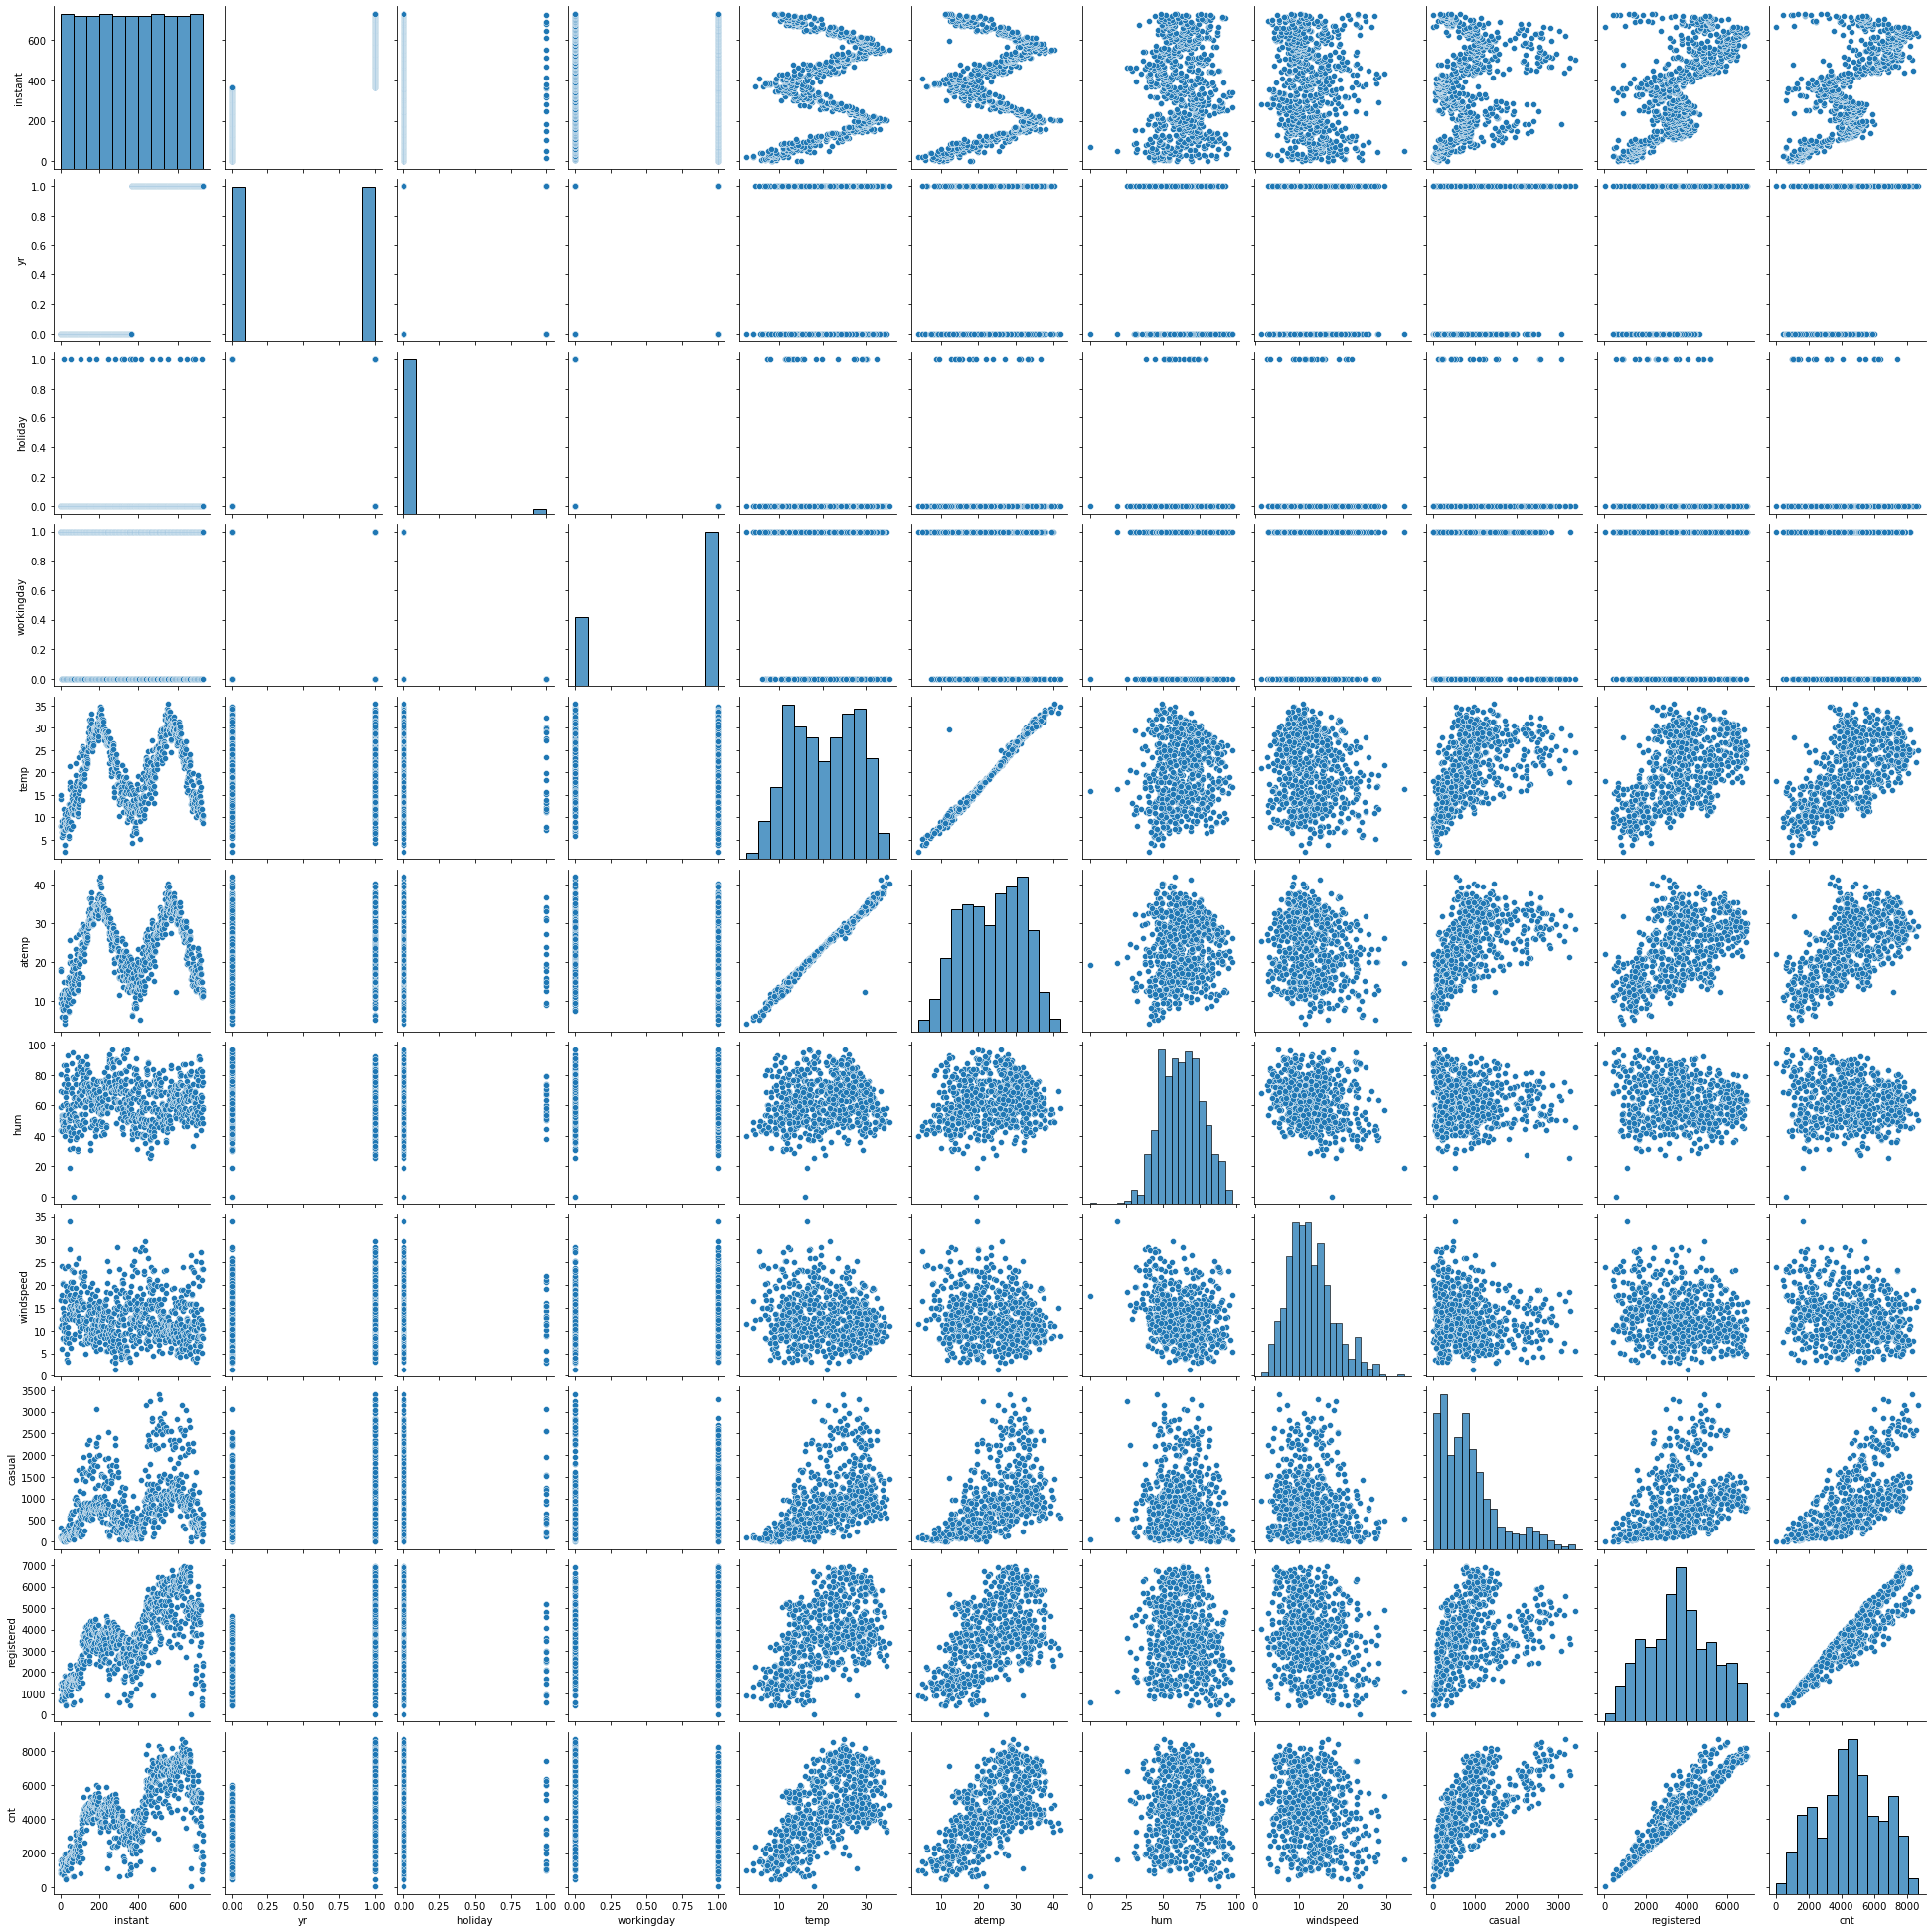

In [15]:
sns.pairplot(bike)
plt.savefig("pairplot_bike.png", bbox_inches='tight')
plt.show()

#### As can see above -
#### 1. casual, registered are highly correlated to cnt as casual + registered = cnt
#### 2. temp and atemp are highly correlated.
#### 3. temp, atemp are correlated to cnt
#### 4. instant and dteday are not useful.

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

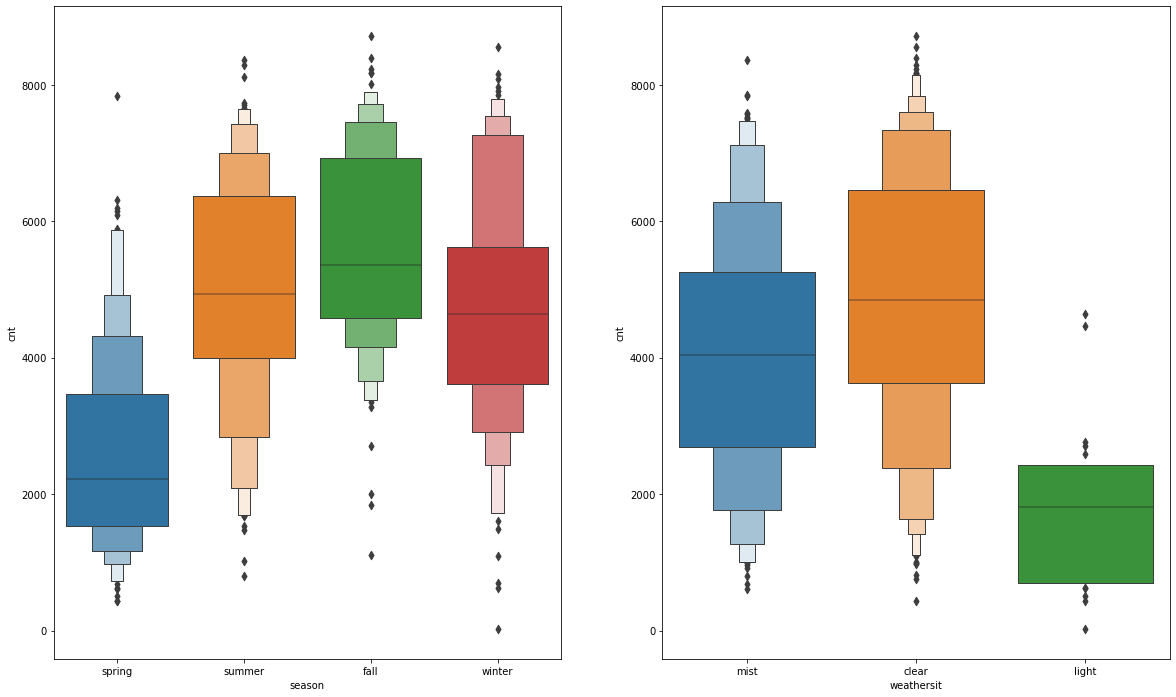

In [16]:
#season Vs cnt
#weathersit Vs cnt

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxenplot(x='season', y='cnt', data=bike)
plt.subplot(1,2,2)
sns.boxenplot(x='weathersit', y='cnt', data=bike)
plt.show()

#### As can see above- 
#### 1. For summer, fall and winter average rides are more as compared to spring. For fall its highest.
#### 2. For mist and clear weathersit ride count is more as compared to light.

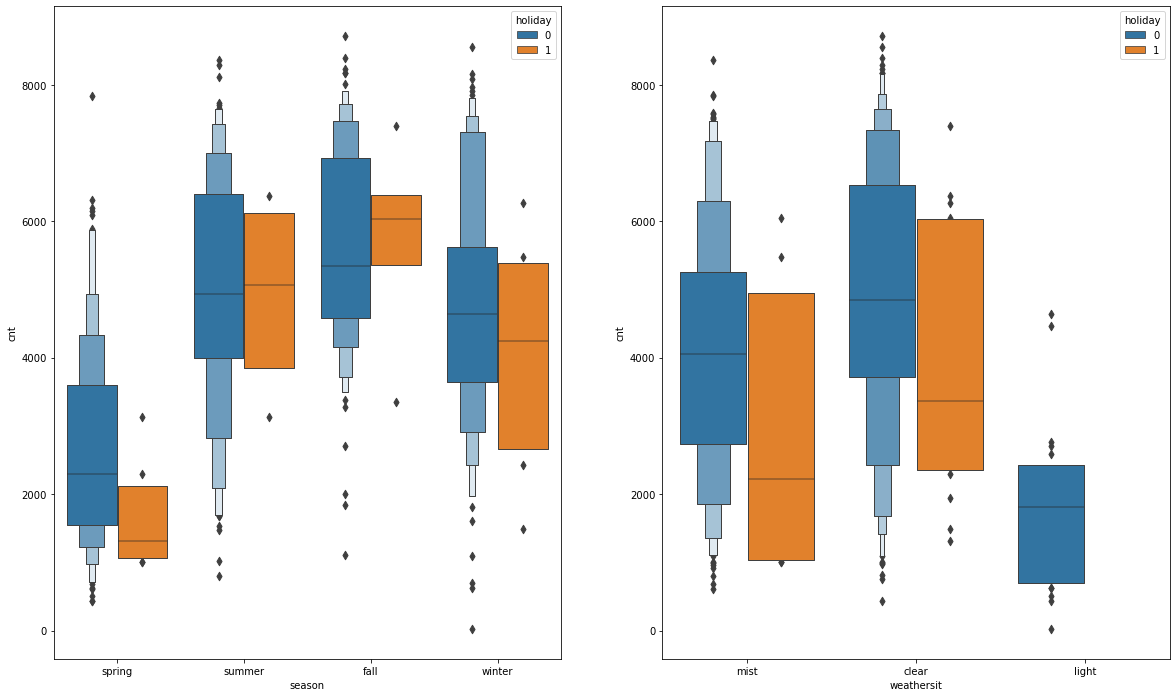

In [17]:
# season Vs cnt with hue='holiday'
# weathersit Vs cnt hue='holiday'

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxenplot(x='season', y='cnt', hue='holiday', data=bike)
plt.subplot(1,2,2)
sns.boxenplot(x='weathersit', y='cnt', hue='holiday', data=bike)
plt.show()

#### As can see above -
#### 1. In season summer and fall, on holidays average ride booking is more.
#### 2. For weathersit don't see any strong relationship with holidays.

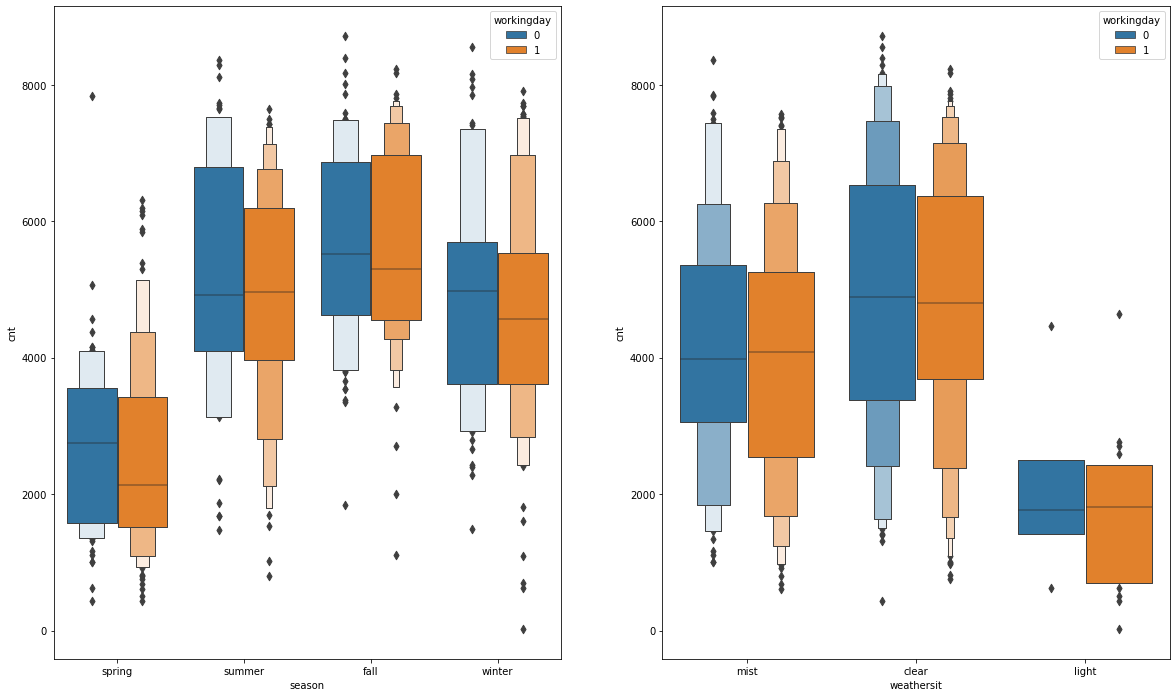

In [18]:
# season Vs cnt with hue='workingday'
# weathersit Vs cnt hue='workingday'

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxenplot(x='season', y='cnt', hue='workingday', data=bike)
plt.subplot(1,2,2)
sns.boxenplot(x='weathersit', y='cnt', hue='workingday', data=bike)
plt.show()

#### As can see above-
#### 1. In summer and fall irrespective of workingday booking is more as compared to spring and winter.
#### 2. For mist and clear weathersit irrespective of workingday booking is more as compared to light i.e. on light rainy/snow day 

### Step 3: Data Preparation

#### Dummy Variables
The variable season and weathersit has four and three levels. We need to convert these levels into integer as well.

In [19]:
# Getting the dummy variables for season 

season_status = pd.get_dummies(bike.season, drop_first= True)

season_status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# Getting the dummy variables for weathersit

weathersit_status = pd.get_dummies(bike.weathersit, drop_first=True)
weathersit_status.head()

,light,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [21]:
# Getting the dummy variables for weekday 

weekday_status = pd.get_dummies(bike.weekday, drop_first=True)

weekday_status.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [22]:
# Getting the dummy variables for month 

month_status = pd.get_dummies(bike.mnth, drop_first=True)

month_status.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# Now let's add all the result to original dataset and drop the original columns season, weathersit, weekday, mnth

bike = pd.concat([bike, season_status, weathersit_status, weekday_status, month_status], axis=1)

bike.drop(['season', 'weathersit', 'weekday', 'mnth'], axis = 1, inplace = True)
bike.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,1,01-01-2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


#### ‘instant’, ‘dteday’, ‘casual’ and ‘registered’ are unnecessary variables, so let's drop them

In [24]:
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
bike.shape

(730, 30)

### Step 4: Splitting the Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.8, test_size = 0.2, random_state=100)

In [27]:
df_train.shape

(584, 30)

In [28]:
df_test.shape

(146, 30)

#### Rescaling the Features

Here we can see that some of the columns have higher integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.

Here will use Min-Max scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'light', 'mist', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sept'],
      dtype='object')

In [32]:
#Apply scaler to ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [33]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,...,0,0,1,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,0,0,0,0,0,0,0,0,1,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,...,0,1,0,0,0,0,0,0,0,0
705,1,0,0,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,1,0,0,0,0,0,0,0,0,0
379,1,0,1,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,...,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479
std,0.500241,0.163378,0.446377,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,...,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### As can see above all the values are in the range of 0 to 1, so now data is ready for model building

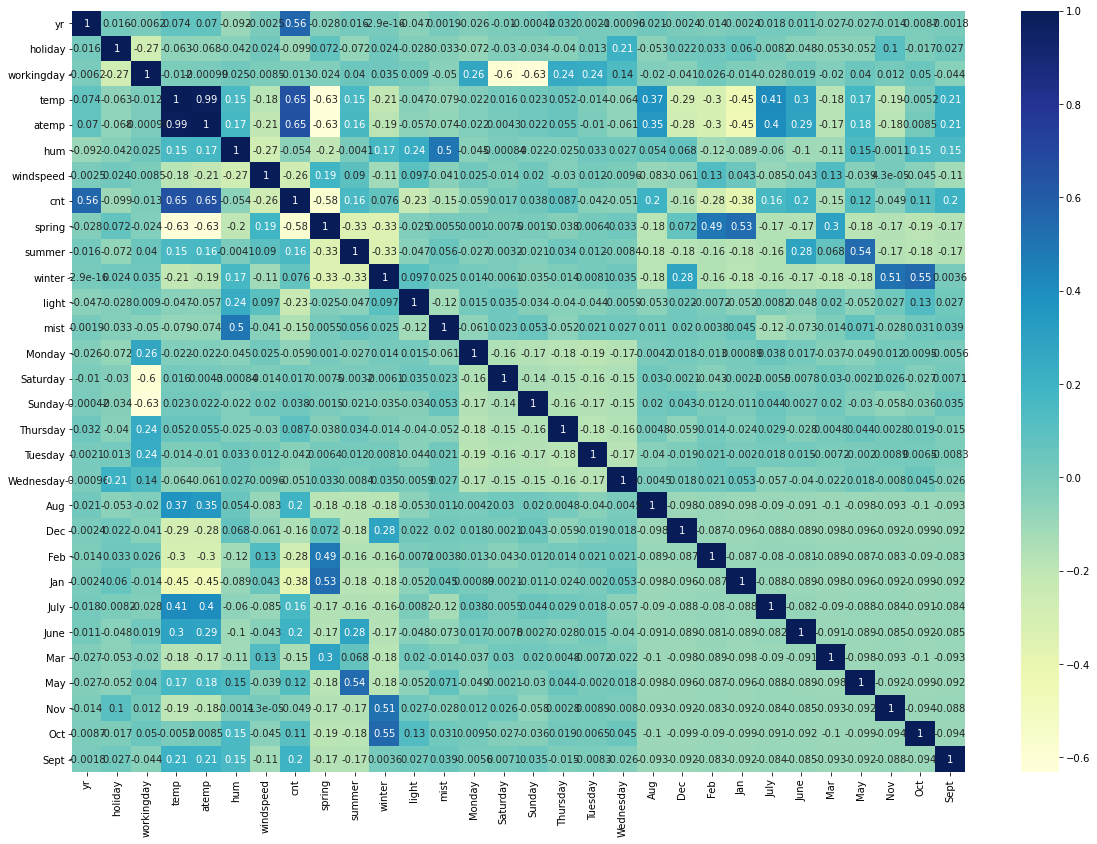

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 14))
sns.heatmap(df_train.corr(), annot=True, cmap= 'YlGnBu')
plt.show()

#### Dividing into X and Y sets for the model building

In [36]:
y_train = df_train.pop('cnt')
x_train = df_train

In [37]:
y_train.head()

367    0.254717
648    0.868385
44     0.217556
705    0.573631
379    0.263346
Name: cnt, dtype: float64

In [38]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
367,1,0,1,0.113228,0.061963,0.454701,0.695175,1,0,0,...,0,0,1,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0,0,1,...,0,0,0,0,0,0,0,0,1,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,1,0,0,...,0,1,0,0,0,0,0,0,0,0
705,1,0,0,0.326094,0.318824,0.787463,0.189819,0,0,1,...,1,0,0,0,0,0,0,0,0,0
379,1,0,1,0.133996,0.108365,0.431945,0.449210,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 5: Building multiple linear model 

In [39]:
# will create a model using all the variables and then will remove unwanted variables manually i.e. RFE

import statsmodels.api as sm

x_train_lm = sm.add_constant(x_train)

lr_1 = sm.OLS(y_train, x_train_lm).fit()

lr_1.params

const         0.382721
yr            0.228156
holiday      -0.131961
workingday   -0.048559
temp          0.386211
atemp         0.061737
hum          -0.151219
windspeed    -0.174760
spring       -0.056774
summer        0.041157
winter        0.109573
light        -0.256832
mist         -0.057397
Monday       -0.031695
Saturday     -0.044986
Sunday       -0.038615
Thursday      0.000068
Tuesday      -0.028879
Wednesday    -0.012047
Aug           0.021219
Dec          -0.050347
Feb          -0.030200
Jan          -0.058472
July         -0.031715
June          0.012851
Mar           0.003818
May           0.020012
Nov          -0.049613
Oct           0.013090
Sept          0.080430
dtype: float64

In [40]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.25e-211
Time:                        13:53:24   Log-Likelihood:                 605.53
No. Observations:                 584   AIC:                            -1151.
Df Residuals:                     554   BIC:                            -1020.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3827      0.082      4.685      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [41]:
# check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# let's create a dataframe that will contain the names of the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,temp,477.83
4,atemp,423.02
2,workingday,68.81
5,hum,42.84
7,spring,13.75
14,Sunday,12.45
9,winter,11.69
13,Saturday,11.61
8,summer,9.92
27,Oct,7.25


As can see above some of the variables have very high VIF, it means there is multicollinearity and need to drop insignificant variables.

#### Dropping the variables and updating the model
atemp have high p-value as well as high VIF, let's drop it and update the model

In [43]:
x = x_train.drop('atemp', 1)

In [44]:
# building second model

x_train_lm = sm.add_constant(x)

lr_2 = sm.OLS(y_train, x_train_lm).fit()

In [45]:
# print the summary of lr_2

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     116.6
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.34e-212
Time:                        13:53:25   Log-Likelihood:                 605.42
No. Observations:                 584   AIC:                            -1153.
Df Residuals:                     555   BIC:                            -1026.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3827      0.082      4.688      0.0

#### No change in R-squared and R-squared, let's calculate VIF again

In [46]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,workingday,68.78
3,temp,43.67
4,hum,42.75
6,spring,13.73
13,Sunday,12.45
8,winter,11.65
12,Saturday,11.61
7,summer,9.89
26,Oct,7.25
25,Nov,6.70


#### workingday have high p-value 0.484 and VIF 68.78, let's drop and update the model

In [47]:
x = x.drop('workingday', 1)

In [48]:
# building third model

x_train_lm = sm.add_constant(x)

lr_3 = sm.OLS(y_train, x_train_lm).fit()

In [49]:
# print the summary of lr_3

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     121.0
Date:                Sun, 09 May 2021   Prob (F-statistic):          6.13e-213
Time:                        13:53:26   Log-Likelihood:                 605.16
No. Observations:                 584   AIC:                            -1154.
Df Residuals:                     556   BIC:                            -1032.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3337      0.042      7.938      0.0

In [50]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,hum,38.69
2,temp,36.51
5,spring,12.02
7,winter,10.99
6,summer,6.92
25,Oct,6.61
24,Nov,5.59
16,Aug,5.52
19,Jan,5.33
20,July,5.16


#### let's drop Thursday having highest p-value

In [51]:
x = x.drop('Thursday', 1)

In [52]:
# building fourth model

x_train_lm = sm.add_constant(x)

lr_4 = sm.OLS(y_train, x_train_lm).fit()

In [53]:
# print the summary

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.41e-214
Time:                        13:53:26   Log-Likelihood:                 605.16
No. Observations:                 584   AIC:                            -1156.
Df Residuals:                     557   BIC:                            -1038.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3337      0.041      8.052      0.0

In [54]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,hum,38.54
2,temp,36.28
5,spring,11.99
7,winter,10.98
6,summer,6.77
24,Oct,6.56
23,Nov,5.54
15,Aug,5.48
18,Jan,5.27
19,July,5.11


#### No change in R-square and adjusted R-square, let's drop Mar variable having p-values 0.884

In [55]:
x = x.drop('Mar', 1)

In [56]:
# building 5th model

x_train_lm = sm.add_constant(x)

lr_5 = sm.OLS(y_train, x_train_lm).fit()

In [57]:
# print the summary 

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.72e-215
Time:                        13:53:27   Log-Likelihood:                 605.15
No. Observations:                 584   AIC:                            -1158.
Df Residuals:                     558   BIC:                            -1045.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3360      0.038      8.737      0.0

In [58]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,36.27
3,hum,36.19
7,winter,9.78
5,spring,8.15
6,summer,6.77
15,Aug,5.19
23,Oct,5.07
4,windspeed,5.05
19,July,4.89
22,Nov,4.34


#### Again no change in R-square and adjusted R-square, let's drop varibales having high p-value and obeserve the result

In [59]:
x = x.drop(['Saturday', 'Sunday', 'Wednesday', 'Aug', 'July', 'June', 'May', 'Oct'], 1)

In [60]:
# building 6th model

x_train_lm = sm.add_constant(x)

lr_6 = sm.OLS(y_train, x_train_lm).fit()

In [61]:
# print the summary 

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.24e-221
Time:                        13:53:27   Log-Likelihood:                 599.03
No. Observations:                 584   AIC:                            -1162.
Df Residuals:                     566   BIC:                            -1083.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3284      0.034      9.564      0.0

In [62]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,hum,32.11
2,temp,17.12
5,spring,5.46
4,windspeed,4.74
7,winter,3.63
6,summer,2.48
14,Jan,2.37
9,mist,2.35
0,yr,2.11
13,Feb,2.02


#### Now all the variables have p-value < 0.05 except Feb, let's drop it see the result

In [63]:
x = x.drop('Feb', 1)

In [64]:
# building 7th model

x_train_lm = sm.add_constant(x)

lr_7 = sm.OLS(y_train, x_train_lm).fit()

In [65]:
# print the summary

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 09 May 2021   Prob (F-statistic):          8.86e-222
Time:                        13:53:28   Log-Likelihood:                 597.22
No. Observations:                 584   AIC:                            -1160.
Df Residuals:                     567   BIC:                            -1086.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3171      0.034      9.360      0.0

In [66]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,hum,31.45
2,temp,16.63
4,windspeed,4.72
5,spring,4.31
7,winter,3.62
6,summer,2.47
9,mist,2.35
0,yr,2.11
14,Nov,1.74
13,Jan,1.70


#### As can be seen above in lr_7 all variables have p-vales < 0.05 but some of them have high VIF, let's drop them see the result

In [67]:
# removing hum 

x = x.drop('hum', 1)

In [68]:
# building 8th model

x_train_lm = sm.add_constant(x)

lr_8 = sm.OLS(y_train, x_train_lm).fit()

In [69]:
# print the summary

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     208.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.88e-219
Time:                        13:53:28   Log-Likelihood:                 588.90
No. Observations:                 584   AIC:                            -1146.
Df Residuals:                     568   BIC:                            -1076.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2490      0.030      8.355      0.0

In [70]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,windspeed,4.67
2,temp,4.10
4,spring,2.77
6,winter,2.60
0,yr,2.09
5,summer,1.93
13,Nov,1.69
12,Jan,1.61
8,mist,1.56
11,Dec,1.42


#### In lr_8, after dropping variable hum there is drastic fall in VIF of temp. It means both of them were highly correlated.
#### windspeed have highest VIF, let's drop it and see the result

In [71]:
x = x.drop('windspeed', 1)

In [72]:
# building 9th model

x_train_lm = sm.add_constant(x)

lr_9 = sm.OLS(y_train, x_train_lm).fit()

In [73]:
# print the summary

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     205.7
Date:                Sun, 09 May 2021   Prob (F-statistic):          6.13e-212
Time:                        13:53:29   Log-Likelihood:                 568.27
No. Observations:                 584   AIC:                            -1107.
Df Residuals:                     569   BIC:                            -1041.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1914      0.029      6.503      0.0

In [74]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.13
5,winter,2.49
0,yr,2.08
3,spring,2.08
4,summer,1.70
12,Nov,1.68
11,Jan,1.61
7,mist,1.56
10,Dec,1.42
13,Sept,1.24


#### We got the R-squared = 0.835 and Adj. R-squared = 0.831 with 14 feature variables which is really good model.
#### Let's try to drop some more variables and observe Adj. R-squared value

In [75]:
# Let's remove 'Jan' with p-value = 0.023

x = x.drop('Jan', 1)

In [76]:
# building 10th model

x_train_lm = sm.add_constant(x)

lr_10 = sm.OLS(y_train, x_train_lm).fit()

In [77]:
# print the summary

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.40e-212
Time:                        13:53:29   Log-Likelihood:                 565.60
No. Observations:                 584   AIC:                            -1103.
Df Residuals:                     570   BIC:                            -1042.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1718      0.028      6.080      0.0

In [78]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.09
5,winter,2.47
0,yr,2.08
4,summer,1.69
11,Nov,1.67
7,mist,1.55
3,spring,1.47
10,Dec,1.37
12,Sept,1.24
9,Tuesday,1.23


#### No major change in both the R-values and VIF so we are good
#### Now let's remove Dec with p-value = 0.022

In [79]:
# Let's remove 'Dec' with p-value = 0.022

x = x.drop('Dec', 1)

In [80]:
# building 11th model

x_train_lm = sm.add_constant(x)

lr_11 = sm.OLS(y_train, x_train_lm).fit()

In [81]:
# print the summary

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     235.6
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.64e-212
Time:                        13:53:30   Log-Likelihood:                 562.92
No. Observations:                 584   AIC:                            -1100.
Df Residuals:                     571   BIC:                            -1043.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1553      0.027      5.662      0.0

In [82]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.08
0,yr,2.07
5,winter,2.00
4,summer,1.69
7,mist,1.55
10,Nov,1.51
3,spring,1.42
11,Sept,1.24
9,Tuesday,1.23
8,Monday,1.22


#### Now, will try to remove Monday, Tuesday, Nov and Sept

In [83]:
x = x.drop(['Monday', 'Tuesday', 'Nov', 'Sept'], 1)

In [84]:
# building 12th model

x_train_lm = sm.add_constant(x)

lr_12 = sm.OLS(y_train, x_train_lm).fit()

In [85]:
# print the summary

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     318.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.24e-205
Time:                        13:53:30   Log-Likelihood:                 536.13
No. Observations:                 584   AIC:                            -1054.
Df Residuals:                     575   BIC:                            -1015.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1545      0.027      5.630      0.0

In [86]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,2.59
0,yr,2.07
4,summer,1.57
7,mist,1.53
5,winter,1.44
3,spring,1.32
6,light,1.05
1,holiday,1.04


#### Here we can observe that there is roughly 2% fall in R values in model lr_11 and lr_12 but number of features are only 8 in lr_12 while in lr_11 its 12.
#### So complexity of lr_12 is less and R-values are also good. Also all the p-vales are 0.00 and VIF are less than 3.
#### We can now consider lr_12 as our final model with Adj. R-squared 81.3%

### Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [87]:
x_train_lm.head()

,const,yr,holiday,temp,spring,summer,winter,light,mist
367,1.0,1,0,0.113228,1,0,0,0,0
648,1.0,1,0,0.468352,0,0,1,0,0
44,1.0,0,0,0.443431,1,0,0,0,0
705,1.0,1,0,0.326094,0,0,1,0,1
379,1.0,1,0,0.133996,1,0,0,0,0


In [88]:
# let's predict target variable 'cnt' with training dataset

y_train_cnt = lr_12.predict(x_train_lm)

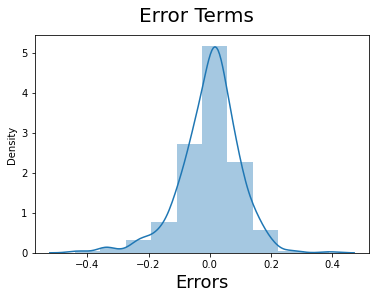

In [89]:
# plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins=10)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)    
plt.show()

#### As can see above error terms are normally distributed with mean at zero

### Step 7: Making Predictions Using the Final Model¶

In [90]:
# Applying scaling on test dataset

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_var] = scaler.transform(df_test[num_var])

In [91]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.547945,0.569603,0.542752,0.635933,0.315127,0.517368,0.226027,0.273973,...,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041
std,0.498699,0.182488,0.499409,0.238088,0.222120,0.156357,0.161524,0.212757,0.419697,0.447530,...,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### dividing test dataset into x_test and y_test

In [92]:
y_test = df_test.pop('cnt')
x_test = df_test

In [93]:
# Adding constant variable to test dataframe
x_test_m12 = sm.add_constant(x_test)

In [95]:
x_test_m12.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'light', 'mist', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sept'],
      dtype='object')

In [97]:
# Creating X_test_12 dataframe by dropping variables from X_test_m12

x_test_m12 = x_test_m12.drop(['workingday', 'atemp', 'hum',
       'windspeed', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sept'], axis = 1)

In [98]:
x_test_m12.columns

Index(['const', 'yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'light',
       'mist'],
      dtype='object')

In [99]:
# Making predictions using the lr_12 model

y_pred_m12 = lr_12.predict(x_test_m12)

### Step 8: Model Evaluation

In [106]:
# let's calculate R-sqaured for test dataset
from sklearn.metrics import r2_score
r2_test = r2_score(y_true=y_test, y_pred=y_pred_m12)

# let's calculate R-sqaured for train dataset
r2_train = r2_score(y_true=y_train, y_pred=y_train_cnt)

#difference between train and test R-squared

r2_final = r2_train - r2_test
r2_final

0.039851052568431244

#### As we can see above difference is less then 5%, so prediction accuracy of model is good.

#### Let's now plot the graph for actual versus predicted values.

In [101]:
y_pred_m12.shape

(146,)

Text(0, 0.5, 'Cnt')

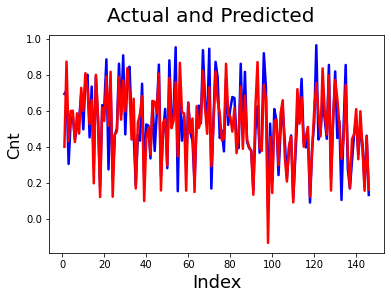

In [103]:
#Actual vs Predicted
c = [i for i in range(1,147,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_m12, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Cnt', fontsize=16)          

#### As can see above actual and predicted count by lr_12 are mostly overlapped it means the model is successful to predict the values near to actual values.

Text(0, 0.5, 'y_pred')

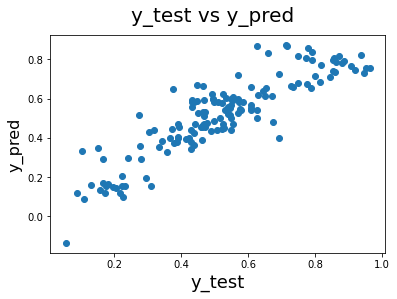

In [100]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m12)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)      

#### We can see that the equation of our best fitted line is:

#### cnt = yr * 0.2302 + temp * 0.5026 + summer * 0.0344 + winter * 0.0894 - holiday * 0.1019 - spring * 0.0884 - light * 0.3008 - mist * 0.0718

### Final Evaluation -
#### 1. There are total 8 driving factors in predicting the demand of  shared bikes.
temp	
yr	
summer	
mist	
winter	
spring	
light	
holiday	
#### 2. temp, yr, summer, winter impacts positively while mist, spring, light, holiday impacts negatively.
#### 3. In summer and winter when temp is high with clear weather and no holiday, there will be high demand of shared bike. 

#### BoomBikes should focus on above points to accelerate their revenue.
